# Daily Climate time series data

Daily climate data in the city of Delhi from 2013 to 2017


## Content

Este conjunto de dados fornece dados de 1o de janeiro de 2013 a 24 de abril de 2017 na cidade de Delhi, Índia. Os 4 parâmetros aqui são:
Meantemp, umidade, wind_speed, meanpressure.

## Imports

In [3]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('Temp'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Temp/DailyDelhiClimateTest.csv
Temp/DailyDelhiClimateTrain.csv


## Read csv and separate

In [6]:
df_train = pd.read_csv("Temp/DailyDelhiClimateTrain.csv")
df_test = pd.read_csv("Temp/DailyDelhiClimateTest.csv")

### Train

In [7]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
print(df_train.shape)
print(df_train.info())

(1462, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


In [11]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


### Test

In [10]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [9]:
print(df_test.shape)
print(df_test.info())

(114, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [12]:
df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


## Plot examples

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Temperature

In [15]:
ts_meantemp = df_train[['date','meantemp']]
ts_meantemp = ts_meantemp.set_index('date')
ts_temperature = ts_meantemp.squeeze()
print(type(ts_temperature))
ts_temperature

<class 'pandas.core.series.Series'>


date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

<Axes: title={'center': 'mean temperature of daily climate'}, xlabel='Date', ylabel='mean temperature'>

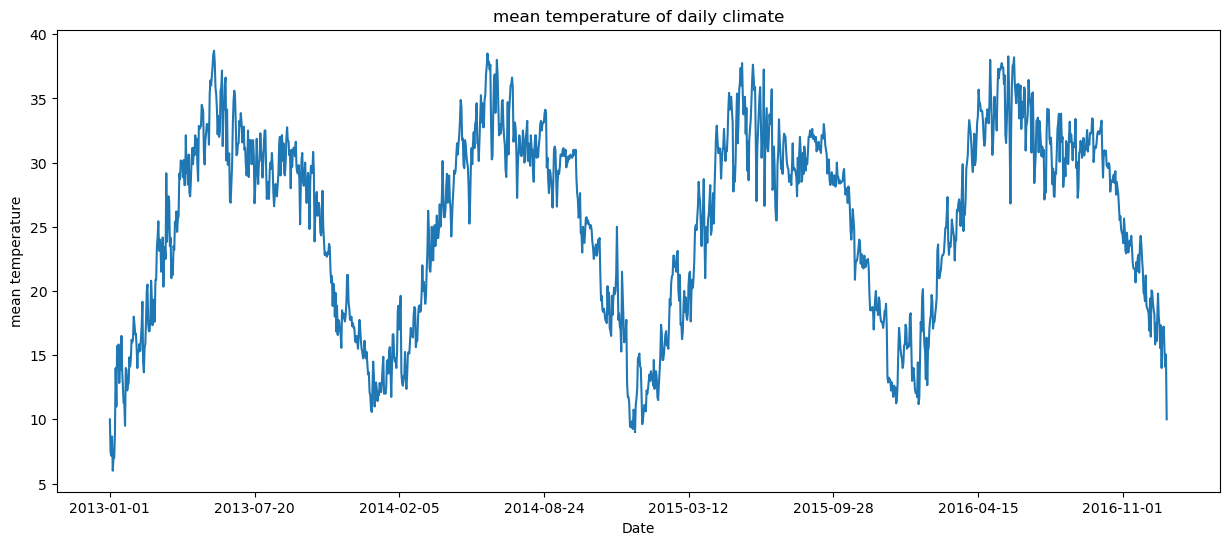

In [16]:
fig, ax = plt.subplots(figsize=(15,6))
ts_temperature.plot(xlabel="Date", ylabel="mean temperature", title="mean temperature of daily climate", ax=ax)

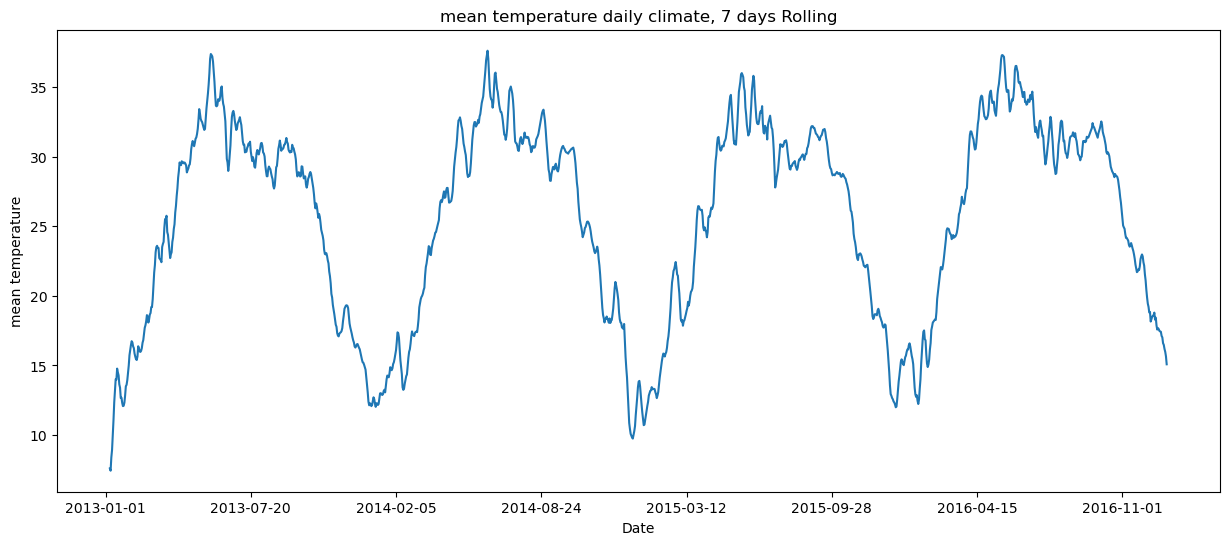

In [31]:
fig, ax = plt.subplots(figsize=(15,6))
ts_temperature.rolling(7).mean().plot(xlabel="Date", ylabel="mean temperature", title="mean temperature daily climate, 7 days Rolling", ax=ax);

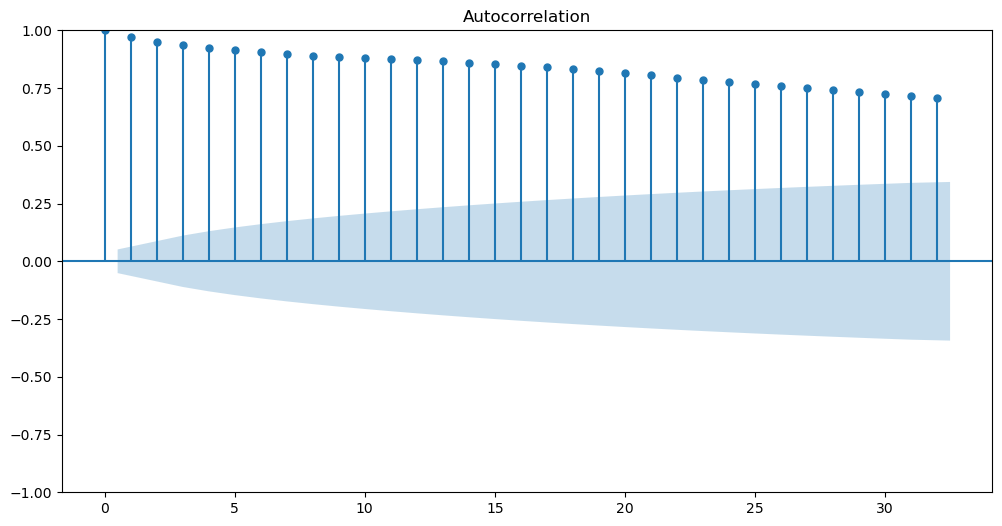

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12,6))
plot_acf(ts_temperature, ax=ax);

Text(0.5, 0, 'Time (Years Num.-Day)')

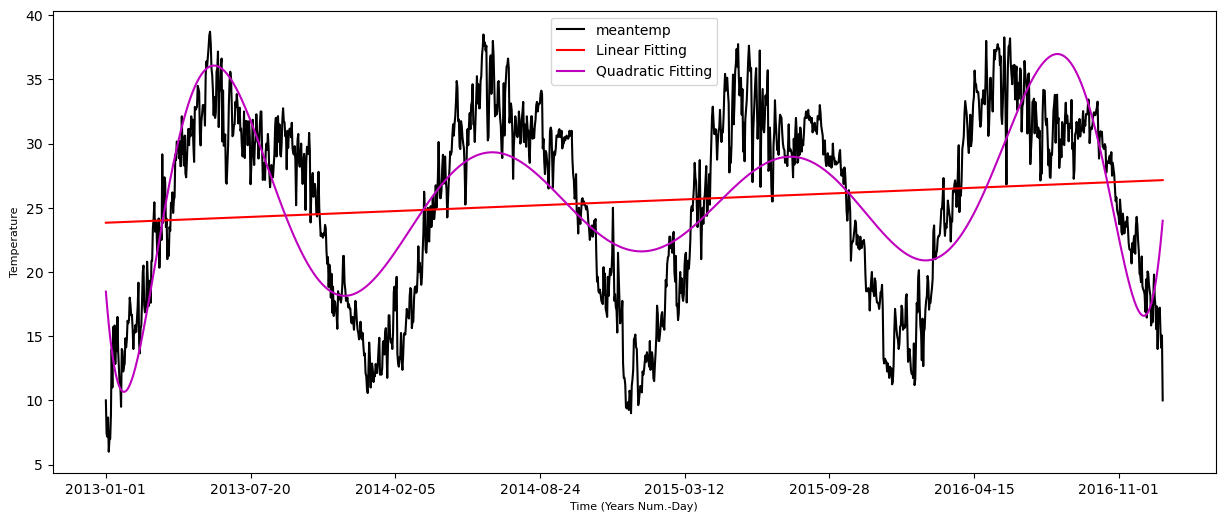

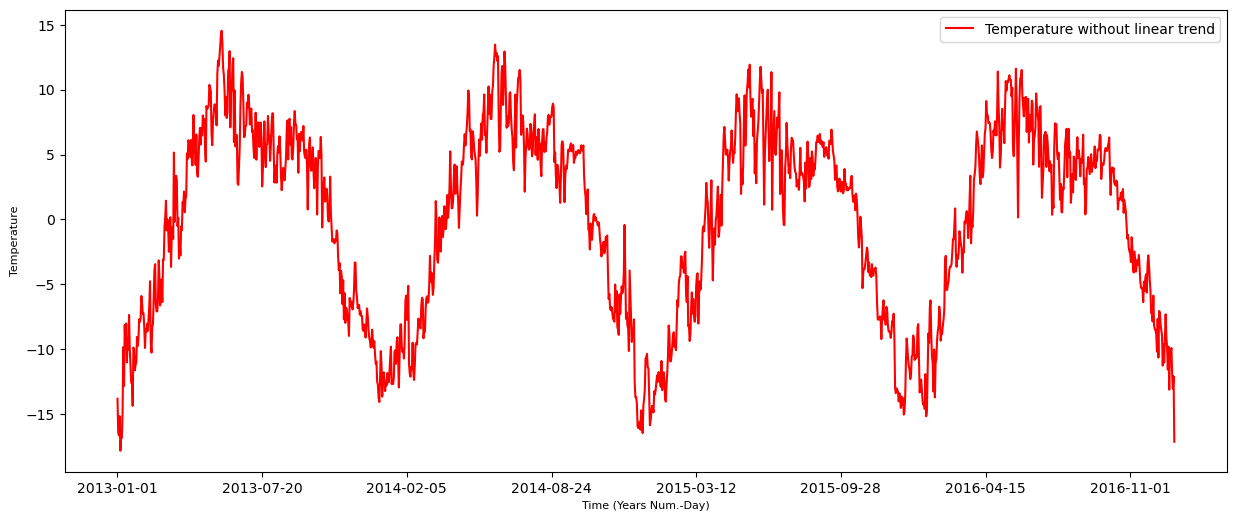

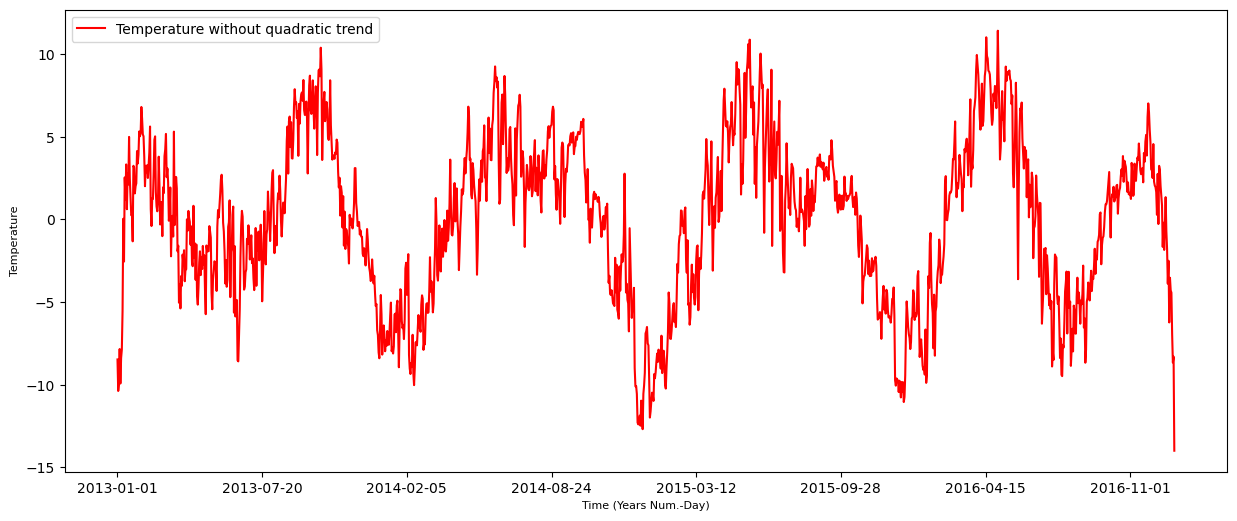

In [50]:
tDays=np.array(range(ts_temperature.shape[0]))

#Linear trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_temperature),1)
linVals=np.polyval(coefs,tDays)
linTS=pd.Series(data=linVals,index=ts_temperature.index,name="Linear Fitting")

#Quadratic trend estimation by fitting
coefs=np.polyfit(tDays,np.array(ts_temperature),10)
quadVals=np.polyval(coefs,tDays)
quadTS=pd.Series(data=quadVals,index=ts_temperature.index,name="Quadratic Fitting")

plt.figure(figsize=(15,6))
ax=ts_temperature.plot(legend=True,color='k')
linTS.plot(ax=ax,legend=True,color='r')
quadTS.plot(ax=ax,legend=True,color='m')
ax.set_ylabel('Temperature',fontdict={'fontsize':8})
ax.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})

#Remove linear trend

plt.figure(figsize=(15,6))
TTsNoLinTrend=ts_temperature-linTS
TTsNoLinTrend.name="Temperature without linear trend"
ax2=TTsNoLinTrend.plot(legend=True,color='r')
ax2.set_ylabel('Temperature',fontdict={'fontsize':8})
ax2.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})

#Remove quadraic trend

plt.figure(figsize=(15,6))
TTsNoQuadTrend=ts_temperature-quadTS
TTsNoQuadTrend.name="Temperature without quadratic trend"
ax3=TTsNoQuadTrend.plot(legend=True,color='r')
ax3.set_ylabel('Temperature',fontdict={'fontsize':8})
ax3.set_xlabel('Time (Years Num.-Day)',fontdict={'fontsize':8})


Text(0, 0.5, 'Normalized Power Spectrum (A.U.)')

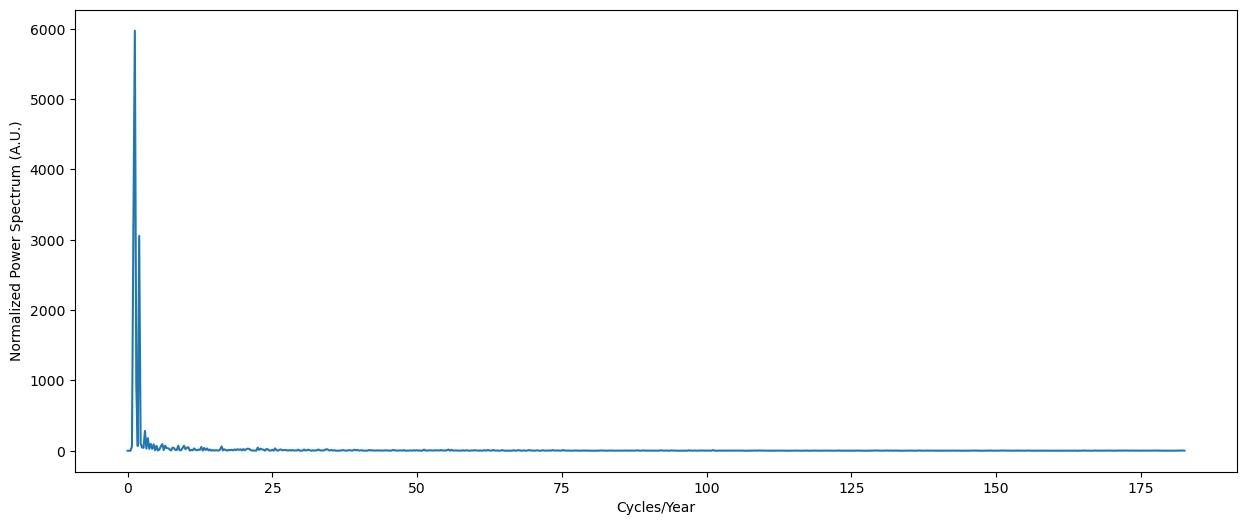

In [54]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



fTS=(np.abs(np.fft.rfft(TTsNoQuadTrend-TTsNoQuadTrend.mean()))**2/TTsNoQuadTrend.size)# Mean was subtracted because 
#we want the evaluate the importance of the non-null frequency components

samp_freq=365 # samples/year
f=np.fft.rfftfreq(TTsNoQuadTrend.size, d=1/samp_freq)
plt.figure(figsize=(15,6))
plt.plot(f,fTS)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")

Text(0.5, 36.72222222222221, 'Time (Year Num.-Day)')

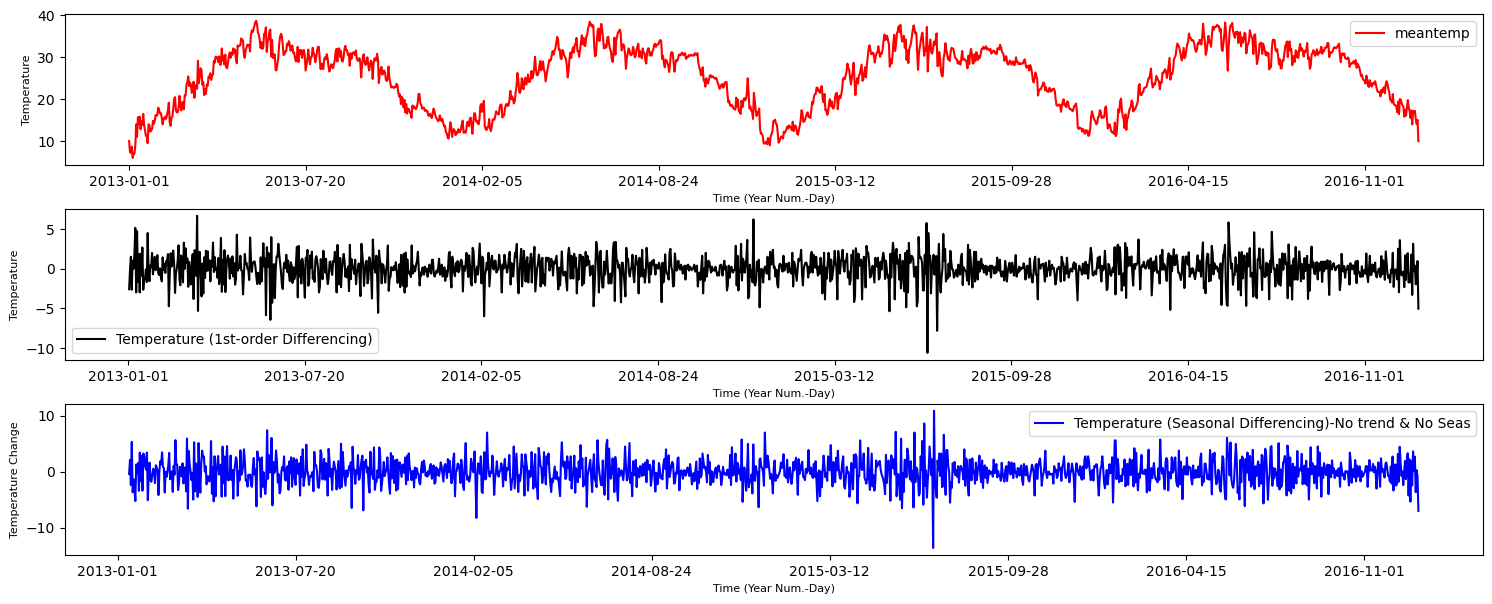

In [68]:
fig, axs=plt.subplots(3, figsize=(15,6))
fig.tight_layout()
ts_temperature.plot(ax=axs[0],legend=True,color='r')
axs[0].set_ylabel('Temperature',fontdict={'fontsize':8})
axs[0].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})
d1T_TS=ts_temperature.diff()
d1T_TS.name="Temperature (1st-order Differencing)"
d1T_TS.plot(ax=axs[1],legend=True,color='k')
axs[1].set_ylabel('Temperature',fontdict={'fontsize':8})
axs[1].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})
d1psTS=d1T_TS.diff(12)
d1psTS.name="Temperature (Seasonal Differencing)-No trend & No Seas"
d1psTS.plot(ax=axs[2],legend=True,color='b')
axs[2].set_ylabel('Temperature Change',fontdict={'fontsize':8})
axs[2].set_xlabel('Time (Year Num.-Day)',fontdict={'fontsize':8})

### Humidity

In [18]:
ts_humidity = df_train[['date', 'humidity']]
ts_humidity = ts_humidity.set_index('date')
ts_humidity = ts_humidity.squeeze()
print(type(ts_humidity))
ts_humidity

<class 'pandas.core.series.Series'>


date
2013-01-01     84.500000
2013-01-02     92.000000
2013-01-03     87.000000
2013-01-04     71.333333
2013-01-05     86.833333
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Name: humidity, Length: 1462, dtype: float64

<Axes: title={'center': 'humidity of daily climate'}, xlabel='Date', ylabel='humity'>

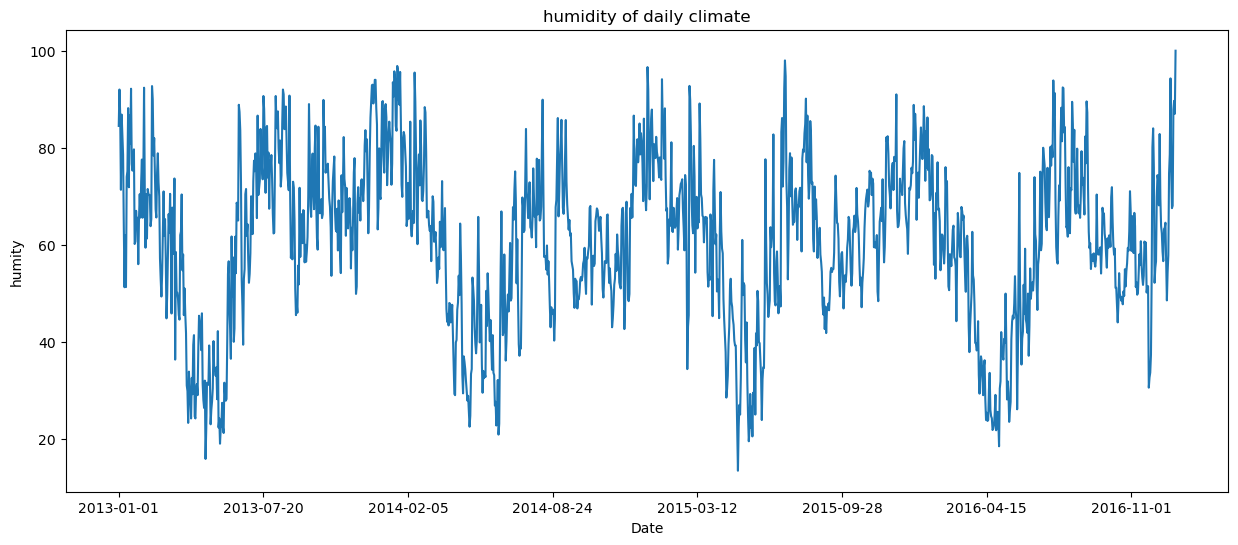

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
ts_humidity.plot(xlabel="Date", ylabel="humity", title="humidity of daily climate", ax=ax)

### Wind

In [20]:
ts_wind_speed = df_train[['date', 'wind_speed']]
ts_wind_speed = ts_wind_speed.set_index('date')
ts_wind = ts_wind_speed.squeeze()
print(type(ts_wind))
ts_wind

<class 'pandas.core.series.Series'>


date
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Name: wind_speed, Length: 1462, dtype: float64

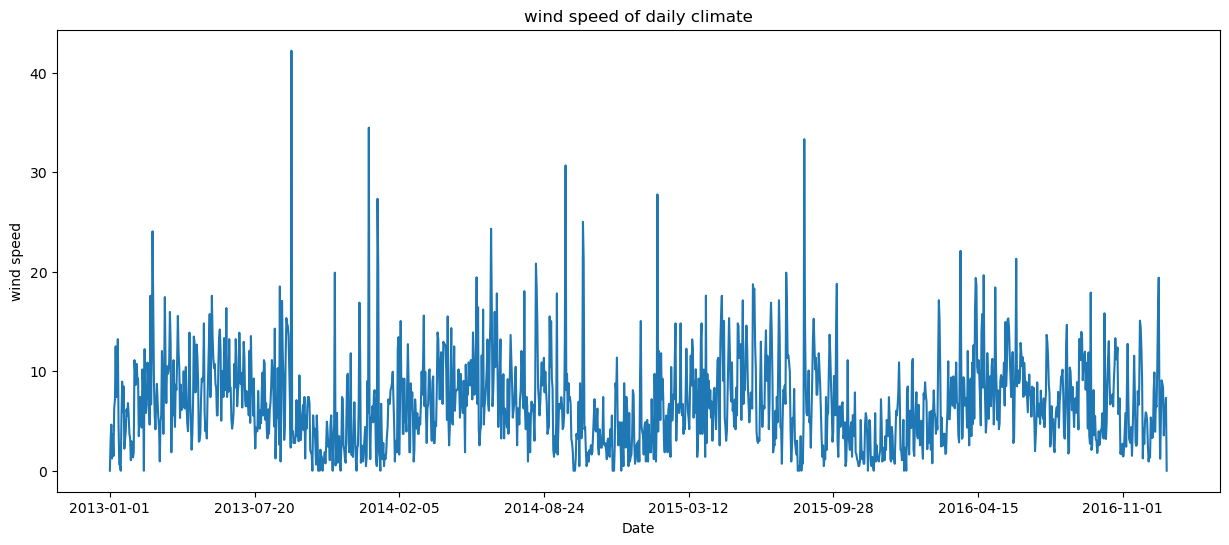

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
ts_wind.plot(xlabel="Date", ylabel="wind speed", title="wind speed of daily climate", ax=ax);

### Pressure

In [23]:
ts_meanpressure= df_train[['date', 'meanpressure']]
ts_meanpressure = ts_meanpressure.set_index('date')
ts_pressure = ts_meanpressure.squeeze()
print(type(ts_pressure))
ts_pressure

<class 'pandas.core.series.Series'>


date
2013-01-01    1015.666667
2013-01-02    1017.800000
2013-01-03    1018.666667
2013-01-04    1017.166667
2013-01-05    1016.500000
                 ...     
2016-12-28    1015.565217
2016-12-29    1016.904762
2016-12-30    1017.904762
2016-12-31    1016.100000
2017-01-01    1016.000000
Name: meanpressure, Length: 1462, dtype: float64

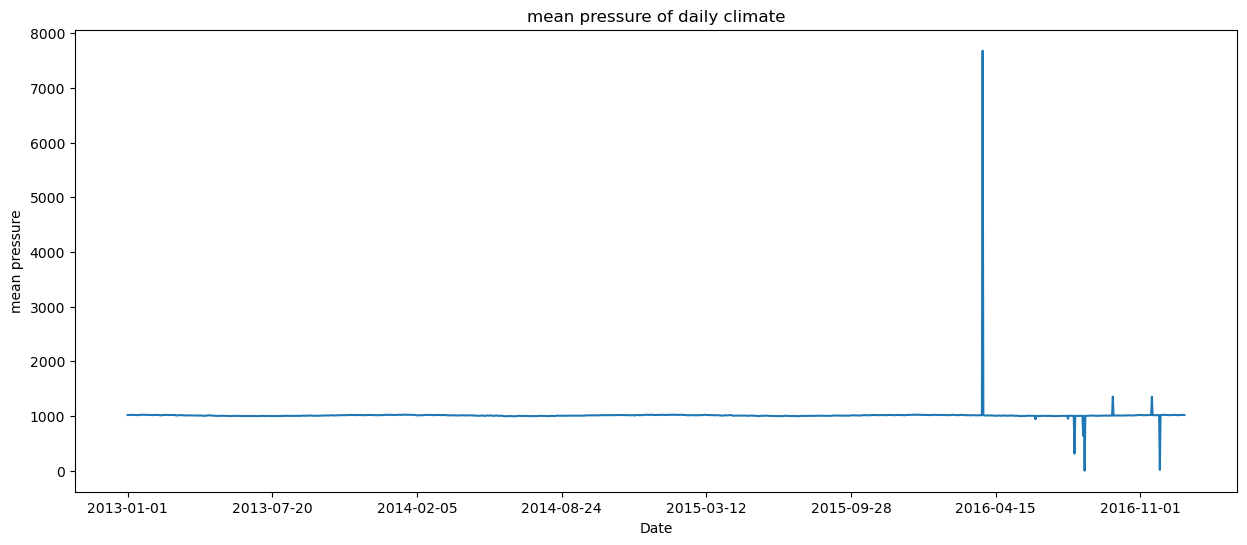

In [24]:
fig, ax = plt.subplots(figsize=(15,6))
ts_pressure.plot(xlabel="Date", ylabel="mean pressure", title="mean pressure of daily climate", ax=ax);